In [1]:
from PIL import Image
from PIL import ImageDraw
import numpy as np

In [2]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [3]:
def draw_tree(start, lam, decay, l0, theta, theta_decay, spread, d, depth=0, max_depth=40, max_n=1000):
    # d.text(xy=start, text=str(depth), fill=(0,0,0,255))
    if depth>max_depth:
        return max_n
    n_children=np.random.poisson(lam=lam/(1+depth))
    if n_children == 0:
        return max_n
    thetas = theta-spread/2+spread*np.random.random(size=n_children)
    for new_theta in thetas:
        end= (start[0]+l0*np.sin(new_theta),start[1]+l0*np.cos(new_theta))
        d.line(xy=(start,end),fill=(0,0,0,255))
        #print(start, end)
        if end[0]>=0 and end[0]<512 and end[1]>=0 and end[1]<512:
            max_n-=draw_tree(start=end,
                          lam=lam,
                          decay=decay,
                          l0=l0*decay,
                          theta=new_theta,
                          theta_decay=theta_decay,
                          spread=spread*theta_decay,
                          d=d,
                          depth=depth+1)

        
        
    


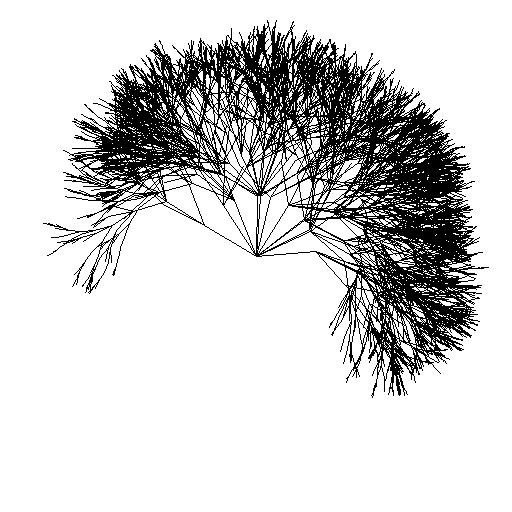

In [3]:

im = Image.new('RGBA', (512,512), (255,255,255,255))

d=ImageDraw.Draw(im)

decay=0.8
branching_proba=0.5

draw_tree(start=(256,256),
          lam=9.5,
          decay=0.75,
          theta_decay=0.75,
          l0=60,
          theta=np.pi,
          spread=np.pi,
          d=d) 
display(im)

In [4]:
def make_tree(start=(256,256),
          lam=9.5,
          decay=0.75,
          theta_decay=0.75,
          l0=60,
          theta=np.pi,
          spread=np.pi):
  im = Image.new('RGBA', (512,512), (255,255,255,255))
  d=ImageDraw.Draw(im)
  draw_tree(start=start,
            lam=lam,
            decay=decay,
            theta_decay=theta_decay,
            l0=l0,
            theta=theta,
            spread=theta,
            d=d) 
  return im

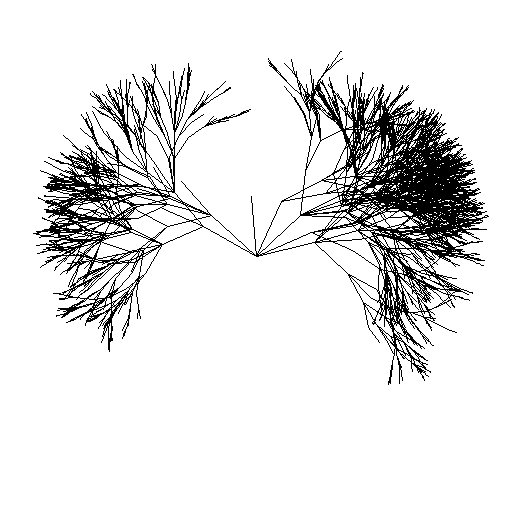

In [14]:
def make_and_display_tree(start_x=256, start_y=256, lam=9.5, decay=0.75,
                          theta_decay=0.75, l0=60, theta=np.pi, spread=np.pi):
    tree_im=make_tree(start=(start_x,start_y),
                   lam=lam,
                   decay=decay,
                   theta_decay=theta_decay,
                   l0=l0,
                   theta=theta,
                   spread=theta)
    display(tree_im)
#make_and_display_tree()

In [15]:
interact(make_and_display_tree, 
         x=5,
         start_x=256,
         start_y=256,
         lam=9.5,
         decay=0.75,
         theta_decay=0.75,
         l0=60,
         theta=np.pi,
         spread=np.pi
        )

interactive(children=(IntSlider(value=256, description='start_x', max=768, min=-256), IntSlider(value=256, des…

<function __main__.make_and_display_tree(start_x=256, start_y=256, lam=9.5, decay=0.75, theta_decay=0.75, l0=60, theta=3.141592653589793, spread=3.141592653589793)>

In [209]:
im.save("tree2.png")

In [126]:
! ls ..

acoustics			infra		     riskExcel
articles			keras		     ruptureArticle
barbouki			keras-experiments    rupture-projects
blockchain-pres			keras-nvidia-vscode  SimpleWebSocketServer
camapi				learning-tensorflow  songs
code-workspaces.code-workspace	liads-paper	     songs_old
comp-vision-tests		ltr-poc-data	     stockfish
discreteconvol			mining		     test_deep_learning
dockerface			models		     test.three
docker-python			mouthpiece	     three.js
dsa-lesson			node		     tmp
Faceness_code			NYC-taxi-talk	     watchman
face-py-faster-rcnn		py-R-FCN	     web-bootstrap-temp
flutomat			py-RFCN-docker	     webcam-broker
ftp-setup			pywebcam
ftp-setup.wiki			random-tree
